In this short kernel, I am going to show you how to choose the `number of principal components` when using principal component analysis for dimensionality reduction as in MoA Competition 

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/lish-moa/train_targets_scored.csv
/kaggle/input/lish-moa/train_targets_nonscored.csv
/kaggle/input/lish-moa/train_features.csv
/kaggle/input/lish-moa/sample_submission.csv
/kaggle/input/lish-moa/test_features.csv


In [2]:
import numpy as np
import pandas as pd
import os

from sklearn import preprocessing
from sklearn.decomposition import PCA

In [3]:
os.listdir('../input/lish-moa')

['train_targets_scored.csv',
 'train_targets_nonscored.csv',
 'train_features.csv',
 'sample_submission.csv',
 'test_features.csv']

In [4]:
train_features = pd.read_csv('../input/lish-moa/train_features.csv')
train_targets_scored = pd.read_csv('../input/lish-moa/train_targets_scored.csv')
train_targets_nonscored = pd.read_csv('../input/lish-moa/train_targets_nonscored.csv')
test_features = pd.read_csv('../input/lish-moa/test_features.csv')

In [5]:
GENES = [col for col in train_features.columns if col.startswith('g-')]
CELLS = [col for col in train_features.columns if col.startswith('c-')]

## Choosing PCA on Genes columns 

Don’t do it. Don’t choose the number of components manually.Instead of that, use the option that allows you to set the variance of the input that is supposed to be explained by the generated components.

### Remember to scale the data to the range between 0 and 1 before using PCA!
Typically, we want the explained variance to be between 95–99%. 

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_g = pd.concat([pd.DataFrame(train_features[GENES]), pd.DataFrame(test_features[GENES])])

data_g_rescaled = scaler.fit_transform(data_g)

data_c = pd.concat([pd.DataFrame(train_features[CELLS]), pd.DataFrame(test_features[CELLS])])
data_c_rescaled = scaler.fit_transform(data_c)

### Now we have standardized our Data

From the Scikit-learn implementation, we can get the information about the explained variance and plot the cumulative variance.

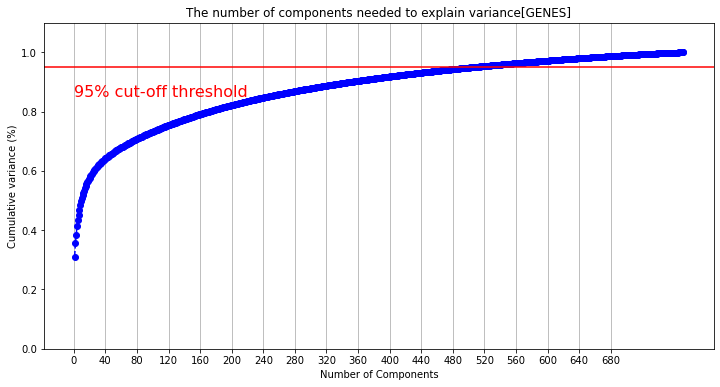

In [7]:
pca = PCA().fit(data_g_rescaled)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 773, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 720, step=40)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance[GENES]')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

On the plotted chart, we see what number of principal components we need.

## In this case, to get 95% of variance explained I need *520* principal components.

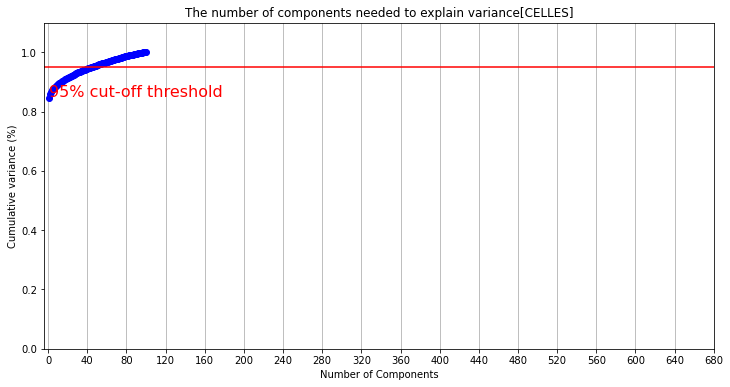

In [8]:
pca = PCA().fit(data_c_rescaled)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 101, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 720, step=40)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance[CELLES]')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()